In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Task ID Definitions ---
EASY_TASK_IDS = [
    "bb5e4c0d-f964-439c-97b6-bdb9747de3f4", "030eeff7-b492-4218-b312-701ec99ee0cc",
    "2ad9387a-65d8-4e33-ad5b-7580065a27ca", "7a5a7856-f1b6-42a4-ade9-1ca81ca0f263",
    "9656a811-9b5b-4ddf-99c7-5117bcef0626",
]
MEDIUM_TASK_IDS = [
    "1704f00f-79e6-43a7-961b-cedd3724d5fd", "6c4c23a1-42a4-43cc-9db1-2f86ff3738cc",
    "cabb3bae-cccb-41bd-9f5d-0f3a9fecd825",
]
HARD_TASK_IDS = [
    "121ba48f-9e17-48ce-9bc6-a4fb17a7ebba", "6766f2b8-8a72-417f-a9e5-56fcaa735837",
]
ALL_TASK_DIFFICULTIES = {
    "Easy": EASY_TASK_IDS,
    "Medium": MEDIUM_TASK_IDS,
    "Hard": HARD_TASK_IDS,
}

def process_results(base_path, task_ids_by_difficulty, category_name=""):
    """
    Processes results from a base path, calculating the overall average
    and success counts per difficulty in a single pass.

    Args:
        base_path (str): The base path for the current run/system.
        task_ids_by_difficulty (dict): Maps difficulty levels to task IDs.
        category_name (str): Optional name for clearer output.

    Returns:
        dict: {'average': avg_value, 'success_counts': {'Easy': X, ...}}
              Returns None for average and zeros for counts if path doesn't exist.
    """
    all_results_list = []
    success_counts = {difficulty: 0 for difficulty in task_ids_by_difficulty.keys()}

    if not os.path.exists(base_path):
        print(f"Warning: Base path for {category_name} ('{base_path}') does not exist.")
        return {'average': None, 'success_counts': success_counts}

    for difficulty, task_ids in task_ids_by_difficulty.items():
        for task_id in task_ids:
            result_file_path = os.path.join(base_path, task_id, "result.txt")
            if os.path.exists(result_file_path):
                try:
                    with open(result_file_path, 'r') as f:
                        value = float(f.read().strip())
                        all_results_list.append(value)
                        if value == 1.0:
                            success_counts[difficulty] += 1
                except (ValueError, IOError) as e:
                    print(f"Warning: Could not read/parse {result_file_path}: {e}")

    average = np.mean(all_results_list) if all_results_list else None
    
    if average is None:
         print(f"No valid result.txt files found in '{category_name or base_path}'.")

    return {'average': average, 'success_counts': success_counts}

print("Setup Complete: Task IDs and Helper Function defined.")

Setup Complete: Task IDs and Helper Function defined.


In [7]:
# --- Set Up Paths ---
current_working_directory = os.getcwd()
common_base_path_root = os.path.join(current_working_directory, 'results_chrome_thesis')
runs = ['first', 'second', 'third']
systems = {
    'Baseline System': os.path.join('pyautogui', 'screenshot', 'ui-tars', 'chrome'),
    'Hierarchical Manager-Worker System': os.path.join('pyautogui', 'screenshot', 'ui-tars-agent', 'chrome')
}

# --- Calculate Averages and Success Counts for All Runs/Systems ---
all_processed_data = {}
print("--- Calculating Averages and Analyzing Task Success ---")

for run in runs:
    print(f"\n--- Processing Run: {run.capitalize()} ---")
    all_processed_data[run] = {}

    for system_name, system_relative_path in systems.items():
        full_path = os.path.join(common_base_path_root, run, system_relative_path)
        category_name = f"{run.capitalize()} - {system_name}"

        # function to get both average and counts
        processed_data = process_results(full_path, ALL_TASK_DIFFICULTIES, category_name)
        all_processed_data[run][system_name] = processed_data

        # Print results for this run/system
        avg = processed_data['average']
        counts = processed_data['success_counts']
        
        print(f"  {system_name}:")
        if avg is not None:
            print(f"    Overall Average: {avg:.2f}")
        else:
            print(f"    Overall Average: No Data")
            
        print(f"    Successful Tasks:")
        for difficulty, count in counts.items():
            total = len(ALL_TASK_DIFFICULTIES[difficulty])
            print(f"      {difficulty}: {count}/{total}")

print("\n--- Data Processing Complete ---")

--- Calculating Averages and Analyzing Task Success ---

--- Processing Run: First ---
  Baseline System:
    Overall Average: 0.10
    Successful Tasks:
      Easy: 1/5
      Medium: 0/3
      Hard: 0/2
  Hierarchical Manager-Worker System:
    Overall Average: 0.30
    Successful Tasks:
      Easy: 3/5
      Medium: 0/3
      Hard: 0/2

--- Processing Run: Second ---
  Baseline System:
    Overall Average: 0.20
    Successful Tasks:
      Easy: 1/5
      Medium: 0/3
      Hard: 1/2
  Hierarchical Manager-Worker System:
    Overall Average: 0.10
    Successful Tasks:
      Easy: 1/5
      Medium: 0/3
      Hard: 0/2

--- Processing Run: Third ---
  Baseline System:
    Overall Average: 0.20
    Successful Tasks:
      Easy: 1/5
      Medium: 0/3
      Hard: 1/2
  Hierarchical Manager-Worker System:
    Overall Average: 0.30
    Successful Tasks:
      Easy: 3/5
      Medium: 0/3
      Hard: 0/2

--- Data Processing Complete ---


In [8]:
# --- Aggregate Data Across All Runs for Overall Comparison ---
system_overall_performance = {}

for system_name in systems.keys():
    system_overall_performance[system_name] = {
        'run_averages': [],
        'total_success_counts': {diff: 0 for diff in ALL_TASK_DIFFICULTIES.keys()},
        'runs_with_data_count': 0
    }

# Aggregate data from all_processed_data
for run_name, systems_data_in_run in all_processed_data.items():
    for system_name, data in systems_data_in_run.items():
        if data['average'] is not None:
            system_overall_performance[system_name]['run_averages'].append(data['average'])
            system_overall_performance[system_name]['runs_with_data_count'] += 1
        
        for difficulty, count in data['success_counts'].items():
            system_overall_performance[system_name]['total_success_counts'][difficulty] += count

# --- Print Overall System Comparison ---
print("\n--- Overall System Performance Comparison (Aggregated) ---")
num_total_runs = len(runs)

for system_name, performance_data in system_overall_performance.items():
    print(f"\nSystem: {system_name}")
    
    run_avgs = performance_data['run_averages']
    if run_avgs:
        overall_avg = np.mean(run_avgs)
        print(f"  Overall Average Score (from {len(run_avgs)}/{num_total_runs} runs): {overall_avg:.2f}")
    else:
        print(f"  Overall Average Score: No Data.")
        
    print(f"  Total Successful Tasks (across {num_total_runs} runs):")
    for difficulty, total_count in performance_data['total_success_counts'].items():
        total_possible = len(ALL_TASK_DIFFICULTIES[difficulty]) * num_total_runs
        if total_possible > 0:
            rate = (total_count / total_possible) * 100
            print(f"    {difficulty}: {total_count}/{total_possible} ({rate:.1f}%)")
        else:
            print(f"    {difficulty}: {total_count}/0 (No tasks defined)")
            
print("\n--- Aggregation and Analysis Complete ---")


--- Overall System Performance Comparison (Aggregated) ---

System: Baseline System
  Overall Average Score (from 3/3 runs): 0.17
  Total Successful Tasks (across 3 runs):
    Easy: 3/15 (20.0%)
    Medium: 0/9 (0.0%)
    Hard: 2/6 (33.3%)

System: Hierarchical Manager-Worker System
  Overall Average Score (from 3/3 runs): 0.23
  Total Successful Tasks (across 3 runs):
    Easy: 7/15 (46.7%)
    Medium: 0/9 (0.0%)
    Hard: 0/6 (0.0%)

--- Aggregation and Analysis Complete ---


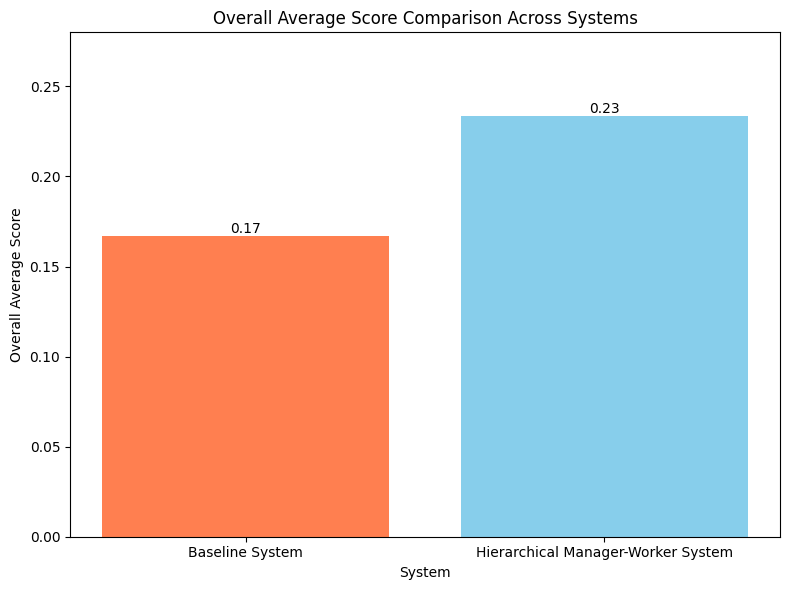

In [12]:
# --- Prepare Data for Overall Average Score Chart ---
system_names = list(system_overall_performance.keys())
overall_averages_chart = []

for system_name in system_names:
    run_averages = system_overall_performance[system_name]['run_averages']
    overall_averages_chart.append(np.mean(run_averages) if run_averages else 0)

# --- Create the Overall Average Score Bar Chart ---
fig_avg, ax_avg = plt.subplots(figsize=(8, 6))
bars = ax_avg.bar(system_names, overall_averages_chart, color=['coral', 'skyblue'])

# Add labels and title
ax_avg.set_xlabel('System')
ax_avg.set_ylabel('Overall Average Score')
ax_avg.set_title('Overall Average Score Comparison Across Systems')
ax_avg.set_xticks(range(len(system_names)))
ax_avg.set_xticklabels(system_names, rotation=0, ha='center')
ax_avg.set_ylim(0, max(overall_averages_chart) * 1.2 if overall_averages_chart else 1.0)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center')

plt.tight_layout()
plt.show()

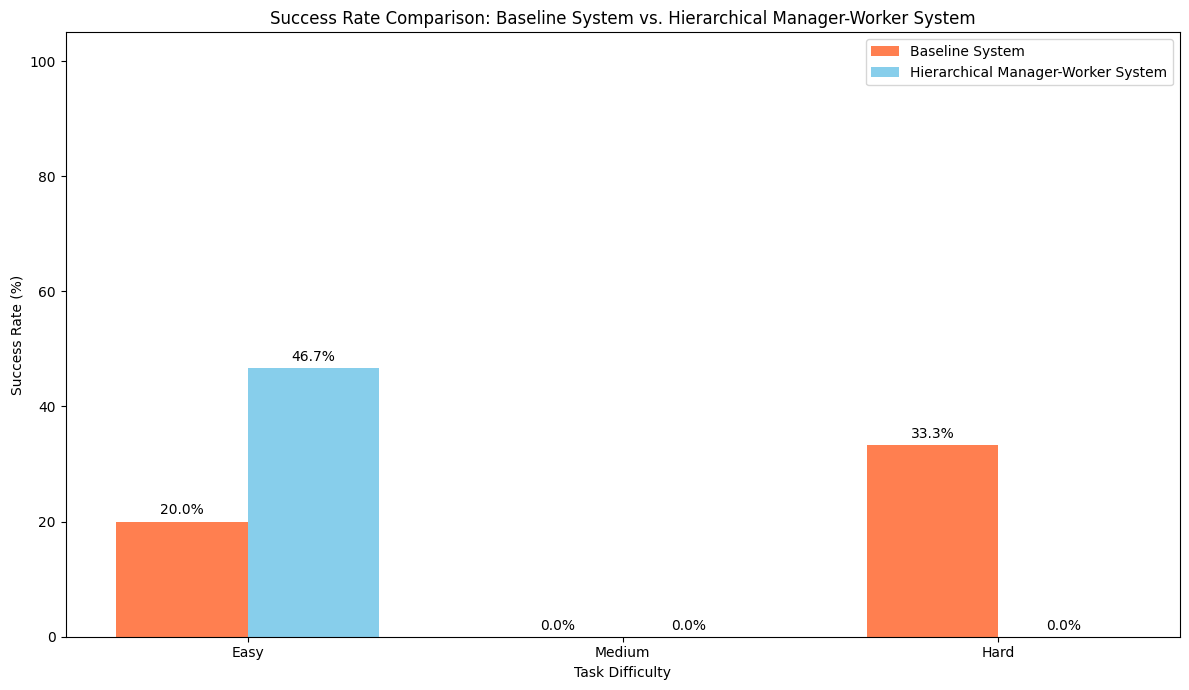

In [15]:
# --- Define Systems for Comparison ---
baseline_system_name = 'Baseline System'
other_system_name = 'Hierarchical Manager-Worker System' 

# --- Prepare Data for Grouped Bar Chart ---
chart_data = []
difficulties = list(ALL_TASK_DIFFICULTIES.keys())
num_total_runs = len(runs)

for difficulty in difficulties:
    tasks_per_run = len(ALL_TASK_DIFFICULTIES[difficulty])
    grand_total_tasks = tasks_per_run * num_total_runs

    baseline_success = system_overall_performance[baseline_system_name]['total_success_counts'][difficulty]
    other_success = system_overall_performance[other_system_name]['total_success_counts'][difficulty]

    baseline_rate = (baseline_success / grand_total_tasks * 100) if grand_total_tasks > 0 else 0
    other_rate = (other_success / grand_total_tasks * 100) if grand_total_tasks > 0 else 0

    chart_data.append({
        'Difficulty': difficulty,
        baseline_system_name: baseline_rate,
        other_system_name: other_rate
    })

df_comparison = pd.DataFrame(chart_data)

# --- Create the Grouped Bar Chart ---
fig_comp, ax_comp = plt.subplots(figsize=(12, 7))
bar_width = 0.35
index = np.arange(len(difficulties))

# Bars for the baseline system
rects1 = ax_comp.bar(index - bar_width/2, df_comparison[baseline_system_name], bar_width,
                   label=baseline_system_name, color='coral')

# Bars for the other system
rects2 = ax_comp.bar(index + bar_width/2, df_comparison[other_system_name], bar_width,
                   label=other_system_name, color='skyblue')

# Add labels, title, and customize
ax_comp.set_xlabel('Task Difficulty')
ax_comp.set_ylabel('Success Rate (%)')
ax_comp.set_title(f'Success Rate Comparison: {baseline_system_name} vs. {other_system_name}')
ax_comp.set_xticks(index)
ax_comp.set_xticklabels(difficulties)
ax_comp.legend()
ax_comp.set_ylim(0, 105) # Set Y limit to 100 (or slightly above)

# Add percentage labels
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, ax_comp)
autolabel(rects2, ax_comp)

plt.tight_layout()
plt.show()